<a href="https://colab.research.google.com/github/Shilpa-PJ/CV-Projects/blob/main/numberplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import  imutils
from google.colab.patches import cv2_imshow

In [ ]:
# Read the image file
image = cv2.imread('/content/Car_Image_1.jpg')


In [ ]:
# Resize the image - change width to 500
image = imutils.resize(image, width=500)


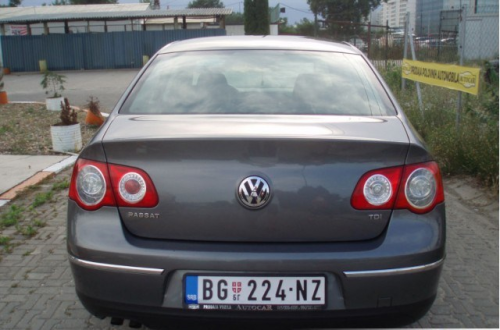

In [ ]:
# Display the original image
cv2_imshow( image)


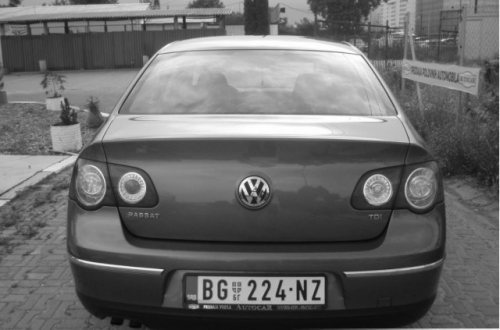

In [ ]:
# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

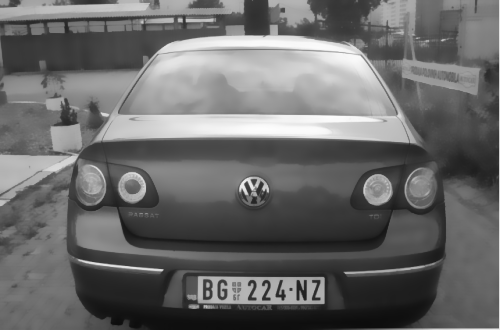

In [ ]:
# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
cv2_imshow( gray)


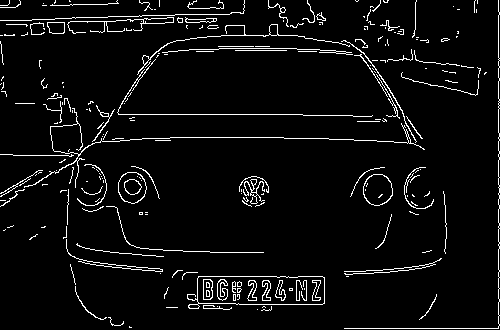

In [ ]:
# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
cv2_imshow( edged)


In [ ]:
# Find contours based on Edges
cnts = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

In [ ]:
# loop over the contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    # if our approximated contour has four points, then we
    # can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

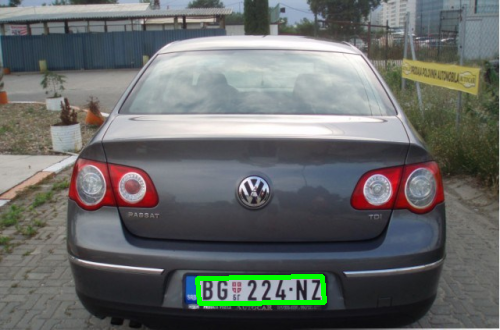

-1

In [ ]:
# Drawing the selected contour on the original image
cv2.drawContours(image, [screenCnt], -1, (0,255,0), 3)
cv2_imshow(image)

cv2.waitKey(0) #